# Project 6 -- Jacqueline Sanchez

**TA Help:** N.A

- 
    
**Collaboration:** N.A
    
- 
- 

## Question 1

In [1]:
# code here
library(data.table)
myDF <- fread("/anvil/projects/tdm/data/death_records/DeathRecords.csv")

In [2]:
# head(myDF)
# uni <- sort(unique(myDF$Race))
# print(uni)

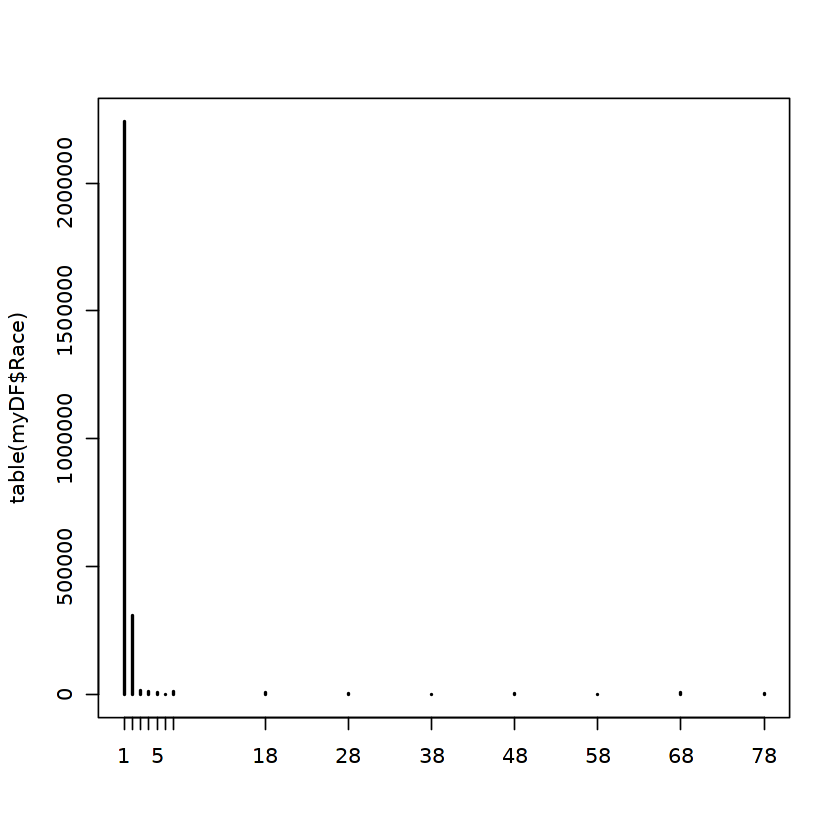

In [3]:
# plotting the value of each race
plot(table(myDF$Race))

FALSE    TRUE 
2620097   11074

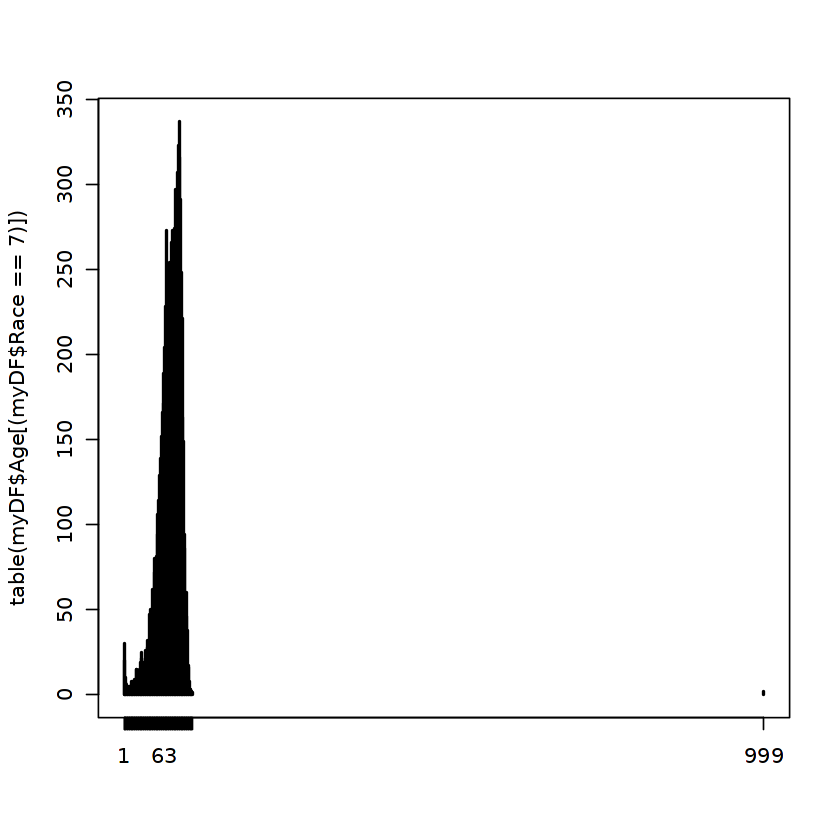

In [4]:
# (a) plot(table(myDF$Race == 7)) # visual representation of how many are of Filipino descent
plot(table(myDF$Age[(myDF$Race == 7)]))
# table(myDF$Race == 7)

tapply(myDF$Race, myDF$Race == 7, length) # to get the exact # of people whose race is Filipino

There are 11,074 Filpino in the data set.

making a table of the values in the Race column and how many times that each Race value occurs

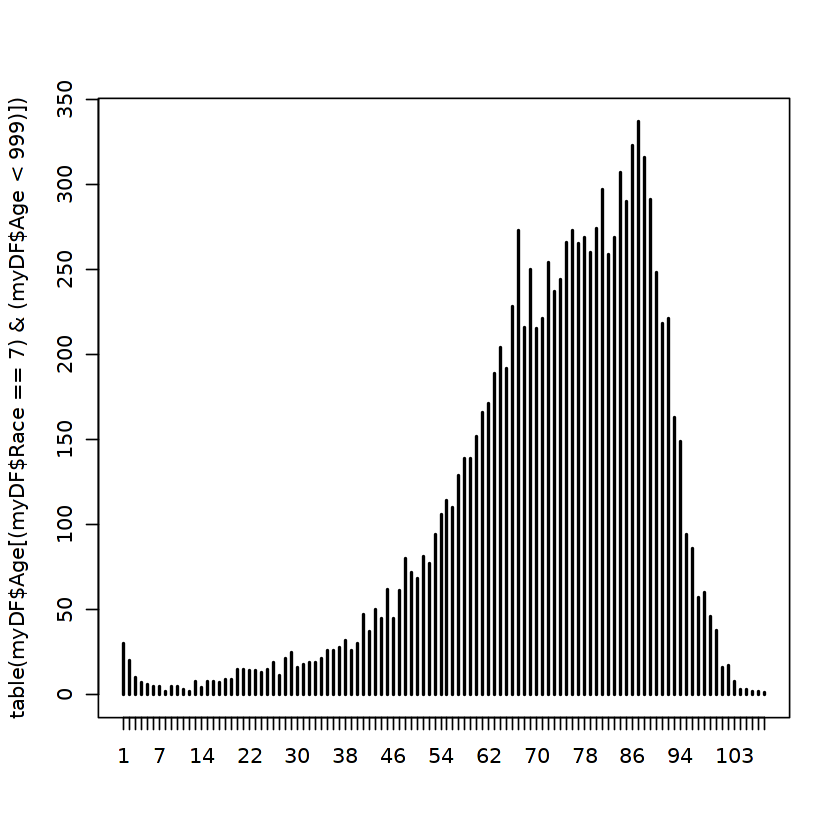

In [5]:
# (b) plotting the table of Age values for people with Filipino race
# plot(table((myDF$Race == 7) & (myDF$Age<999)))
plot(table(myDF$Age[(myDF$Race == 7) & (myDF$Age < 999)]))

A plot for the peope who are of Filipino race and whose age is not missing

## Question 2

In [6]:
# reading the dataset
myDF <- fread("/anvil/projects/tdm/data/8451/The_Complete_Journey_2_Master/5000_transactions.csv")
head(myDF)

BASKET_NUM,HSHD_NUM,PURCHASE_,PRODUCT_NUM,SPEND,UNITS,STORE_R,WEEK_NUM,YEAR
<int>,<int>,<chr>,<int>,<dbl>,<int>,<chr>,<int>,<int>
24,1809,03-JAN-16,5817389,-1.50,-1,SOUTH,1,2016
24,1809,03-JAN-16,5829886,-1.50,-1,SOUTH,1,2016
34,1253,03-JAN-16,539501,2.19,1,EAST,1,2016
60,1595,03-JAN-16,5260099,0.99,1,WEST,1,2016
60,1595,03-JAN-16,4535660,2.50,2,WEST,1,2016
168,3393,03-JAN-16,5602916,4.50,1,SOUTH,1,2016


In [7]:
table(myDF$STORE_R[myDF$SPEND<0])


CENTRAL    EAST   SOUTH    WEST 
   2750    3269    2675    3952 

Showing the number of refunds for each `STORE_R` value. 

## Question 3

In [8]:
# code here
myDF <- fread("/anvil/projects/tdm/data/beer/reviews_sample.csv")
head(myDF, 1)

beer_id,username,date,text,look,smell,taste,feel,overall,score
<int>,<chr>,<IDate>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
271781,bluejacket74,2017-03-17,"750 ml bottle, 2016 vintage, bottle #304 of 360. Served in a DFH snifter, the beer pours dark brown/black with about an inch tan head that stuck around a little while. There's also a good amount of lacing. I like the aroma, the brew smells like dark fruit (raisin, plum), chocolate, roasted malt, and a bit of licorice. For the most part I think the taste is just like the aroma, but with some coffee flavor noticeable too. Mouthfeel/body is medium/full, it's creamy and coating with a moderate amount of carbonation. I think it's a good overall brew, worth picking up if you want a nice straight forward imperial stout. Here's hoping Four String brings this back in the future! $9.99 a bottle.",4,4,4,4.25,4,4.03


In [9]:
# (a) making a table of the values in the column `myDF$username`
tail(sort(table(myDF$username)))


       jaydoc   Texasfan549         Sammy   kylehay2004 StonedTrippin 
         1489          1532          1591          1628          1630 
      acurtis 
         1646 

In [10]:
# (b) the average `score` of the reviews that were wrtiten by the user `acurtis` 
table(myDF$username == "acurtis") # 1646 reviews come from acurtis 

# getting the scores written by acurtis
acurtis_score <- myDF$score[myDF$username == "acurtis"]

# getting the average score of review written by acurtis 
mean(acurtis_score)


 FALSE   TRUE 
998353   1646 

[1] 3.655802

`acurtis` review score has an average of ~ 3.6558

## Question 4

In [11]:
# code here
library(data.table)
myDF <- fread("/anvil/projects/tdm/data/election/itcont1980.txt", quote="")
names(myDF) <- c("CMTE_ID", "AMNDT_IND", "RPT_TP", "TRANSACTION_PGI", "IMAGE_NUM", "TRANSACTION_TP", "ENTITY_TP", "NAME", "CITY", "STATE", "ZIP_CODE", "EMPLOYER", "OCCUPATION", "TRANSACTION_DT", "TRANSACTION_AMT", "OTHER_ID", "TRAN_ID", "FILE_NUM", "MEMO_CD", "MEMO_TEXT", "SUB_ID")
head(myDF, 1)

CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
<chr>,<chr>,<chr>,<chr>,<int64>,<chr>,<lgl>,<chr>,<chr>,<chr>,...,<chr>,<lgl>,<int>,<int>,<chr>,<lgl>,<lgl>,<lgl>,<chr>,<int64>
C00078279,A,M11,P,80031492155,22Y,NA,"MCKENNON, K R",MIDLAND,MI,...,,NA,10031979,400,,NA,NA,NA,CONTRIBUTION REF TO INDIVIDUAL,3062020110011466469


In [12]:
table(myDF$NAME[is.na(myDF$TRANSACTION_DT)])


      CURCIO, BARBARA G SCHECK, RICHARD HERBERT          WOLFF, GARY W. 
                      1                       6                       2 

BARBARA has 1 na, HERBERT has 6 na's, and WOLFF has 2 missings. 

## Question 5

In [13]:
# code here
myDF <- fread("/anvil/projects/tdm/data/flights/subset/1990.csv")
head(myDF, 1)

Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,...,<lgl>,<lgl>,<int>,<lgl>,<int>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1990,1,3,3,1707,1630,1755,1723,US,29,...,NA,NA,0,NA,0,NA,NA,NA,NA,NA


In [14]:
# getting the mean of the DepDeplay
depDelay_for_EJL <- mean(myDF$DepDelay[myDF$Origin == "EWR" | myDF$Origin == "JFK" | myDF$Origin == "LGA"], na.rm = TRUE)

mean(depDelay_for_EJL)

[1] 9.400064

the average of the `DepDelay` of all of the flights whose `Origin` airport is `EWR` or `JFK` or `LGA` is 9.4000

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.